# Business Case study : Micro-mobility service provider

# Importing all the libraries for analyzing the case study

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from scipy.stats import poisson
from scipy.stats import binom
import scipy.stats as stats
import math
from scipy.stats import chi2 # Distribution (cdf etc.)
from scipy.stats import chisquare # Statistical test (chistat, pvalue)
from scipy.stats import chi2_contingency # Categorical Vs Categorical
from scipy.stats import ttest_rel,ttest_1samp,ttest_ind
from scipy.stats import binom,tiecorrect
from scipy.stats import f,f_oneway
from scipy.stats import f,f_oneway,kruskal,ttest_ind,levene,shapiro,kstest,norm
from statsmodels.distributions.empirical_distribution import ECDF
from statsmodels.graphics.gofplots import qqplot
from scipy.stats import levene
import stats

# Defining Problem Statement and Analyzing basic metrics

# Problem Statement
Company has recently suffered considerable dips in its revenues. They have contracted a consulting company to understand the factors on which the demand for these shared electric cycles depends. Specifically, they want to understand the factors affecting the demand for these shared electric cycles in the Indian market.

# Basic information
1) datetime: datetime
2) season: season (1: spring, 2: summer, 3: fall, 4: winter)
3) holiday: weekend holiday is 1 and not holiday is 0
4) workingday: if day is neither weekend nor holiday is 1, otherwise is 0.
5) weather:
    1: Clear, Few clouds, partly cloudy, partly cloudy
    2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
    3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
    4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
6) temp: temperature in Celsius
7) atemp: feeling temperature in Celsius
8) humidity: humidity
9) windspeed: wind speed
10) casual: count of casual users
11) registered: count of registered users
12) count: count of total rental bikes including both casual and registered

In [2]:
df = pd.read_csv('transportation_company.csv')
df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


In [3]:
df_1 = df
# Just for hypothesis testing use

In [4]:
df.shape

(10886, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


# We need to change the following datatypes for the attributes:
  1) datetime = to datetime (datetime64[ns])
  2) season = categorical (object)
  3) hoilday = to categorical (object)
  4) workingday = to categorical (object)
  5) weather = categorical (object)

In [6]:
df['datetime'] = pd.to_datetime(df['datetime'])
# Changing datatype int64 to object
df['datetime'] = pd.to_datetime(df['datetime'])
columns = ['season', 'holiday', 'workingday', 'weather']
df[columns] = df[columns].astype('object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  object        
 2   holiday     10886 non-null  object        
 3   workingday  10886 non-null  object        
 4   weather     10886 non-null  object        
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(4), object(4)
memory usage: 1020.7+ KB


In [8]:
df.isna().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

# Insight : 
1) The above dataset contains zero null values and no missing values.

In [9]:
df.iloc[:,1:].describe(include='all')

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.0,10886.0,10886.0,10886.0,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
unique,4.0,2.0,2.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,4.0,0.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,2734.0,10575.0,7412.0,7192.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,NaN,NaN,NaN,NaN,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,NaN,NaN,NaN,NaN,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,NaN,NaN,NaN,NaN,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,NaN,NaN,NaN,NaN,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,NaN,NaN,NaN,NaN,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000


# Insights
1) The top season when users use rented bikes is winter.
2) The top weather preferences of users are: clear, few clouds, partly cloudy, or partly cloudy.
3) Casual and registered columns might have outliers because their mean and median are very far away from one another.

# Non-Graphical Analysis: Value counts and unique attributes

# Value Counts:

In [10]:
holiday_counts = df['holiday'].value_counts()
percentage_holiday_counts = (holiday_counts / len(df)) * 100
print(f"holiday count : \n{holiday_counts} \n holiday percentage : \n{percentage_holiday_counts}")

holiday count : 
0    10575
1      311
Name: holiday, dtype: int64 
 holiday percentage : 
0    97.14312
1     2.85688
Name: holiday, dtype: float64


In [11]:
season_counts = df['season'].value_counts()
percentage_season_counts = (season_counts / len(df)) * 100
print(f"season count : \n{season_counts} \n season percentage : \n{percentage_season_counts}")

season count : 
4    2734
2    2733
3    2733
1    2686
Name: season, dtype: int64 
 season percentage : 
4    25.114826
2    25.105640
3    25.105640
1    24.673893
Name: season, dtype: float64


In [12]:
weather_counts = df['weather'].value_counts()
percentage_weather_counts = (weather_counts / len(df)) * 100
print(f"weather count : \n{weather_counts} \n weather percentage : \n{percentage_weather_counts}")

weather count : 
1    7192
2    2834
3     859
4       1
Name: weather, dtype: int64 
 weather percentage : 
1    66.066507
2    26.033437
3     7.890869
4     0.009186
Name: weather, dtype: float64


In [13]:
workingday_counts = df['workingday'].value_counts()
percentage_workingday_counts = (workingday_counts / len(df)) * 100
print(f"workingday count : \n{workingday_counts} \n workingday percentage : \n{percentage_workingday_counts}")

workingday count : 
1    7412
0    3474
Name: workingday, dtype: int64 
 workingday percentage : 
1    68.087452
0    31.912548
Name: workingday, dtype: float64


# Insights
1) With reference to the above dataset, 97.14% is non-holiday and 2.58% is holiday.
2) User data season-wise, approximately distributed
3) The most preferable weather is 1 (approximately 66.06%), followed by 26.03% and 7.89%.
4) Working day percentage is 68.08% and non-working day percentage is 31.91%.

# unique attributes

In [14]:
unique_weather_count = df['weather'].nunique()
print('Unique weather count:',unique_weather_count)

Unique weather count: 4


In [15]:
unique_season_count = df['season'].nunique()
print('Unique season count:',unique_season_count)

Unique season count: 4


# Insights
1) There are four unique seasons in the above dataset.
2) The above dataset contains four distinct weather conditions.

# Visual Analysis - Univariate & Bivariate

# Univariate Analysis:

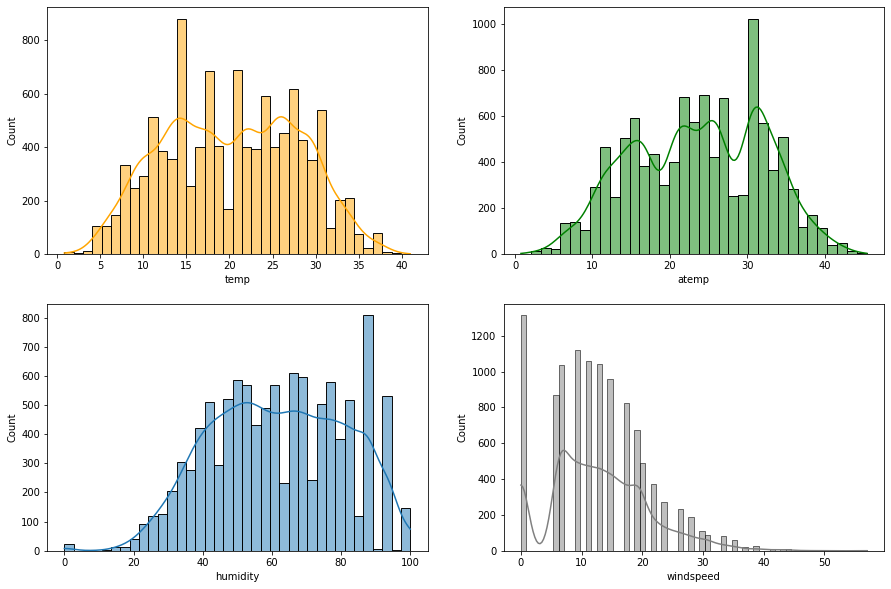

In [16]:
fig, axis = plt.subplots(nrows=2, ncols=2, figsize=(15,10))
sns.histplot(data=df, x='temp', ax=axis[0,0],color = "orange", kde=True)
sns.histplot(data=df, x='atemp', ax=axis[0,1],color = "green", kde=True)
sns.histplot(data=df, x='humidity', ax=axis[1,0], kde=True)
sns.histplot(data=df, x='windspeed',ax=axis[1,1],color = "grey", kde=True)
plt.show()

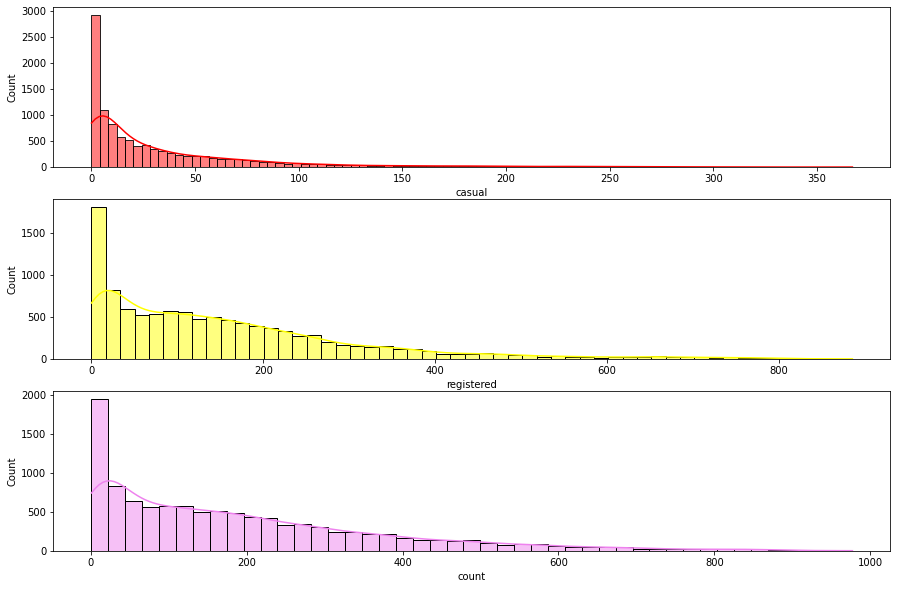

In [17]:
fig, axis = plt.subplots(nrows=3, ncols=1, figsize=(15,10))
sns.histplot(data=df, x='casual',ax=axis[0],color = "red", kde=True)
sns.histplot(data=df, x='registered',ax=axis[1],color = "yellow", kde=True)
sns.histplot(data=df, x='count',ax=axis[2],color = "violet", kde=True)
plt.show()

# Insights
1) The count of casuals, registered users, and both users follows the Log Normal Distribution.
2) Windspeed follows the binomial distribution.
3) temp, atemp, and humidity follow the normal distribution.

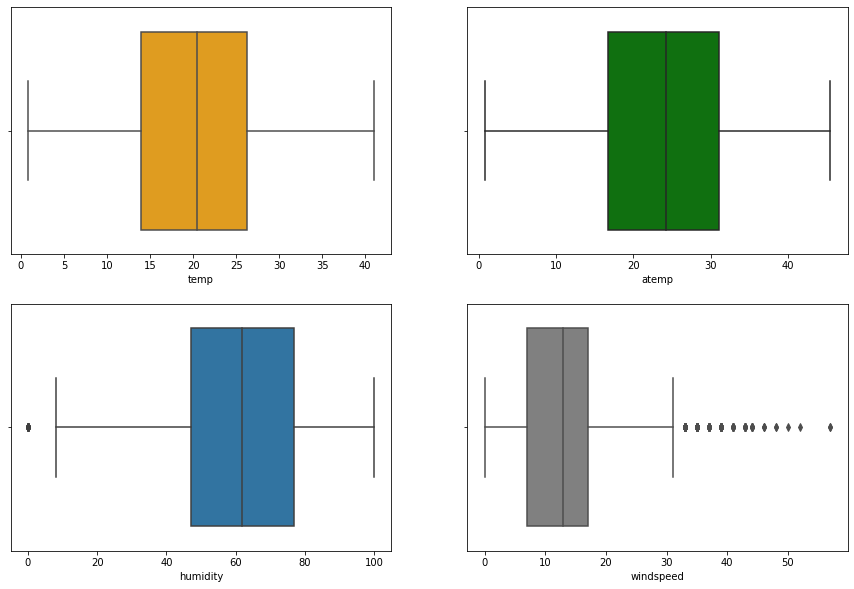

In [18]:
fig, axis = plt.subplots(nrows=2, ncols=2, figsize=(15,10))
sns.boxplot(data=df, x='temp', ax=axis[0,0],color = "orange")
sns.boxplot(data=df, x='atemp', ax=axis[0,1],color = "green")
sns.boxplot(data=df, x='humidity', ax=axis[1,0])
sns.boxplot(data=df, x='windspeed',ax=axis[1,1],color = "grey")
plt.show()

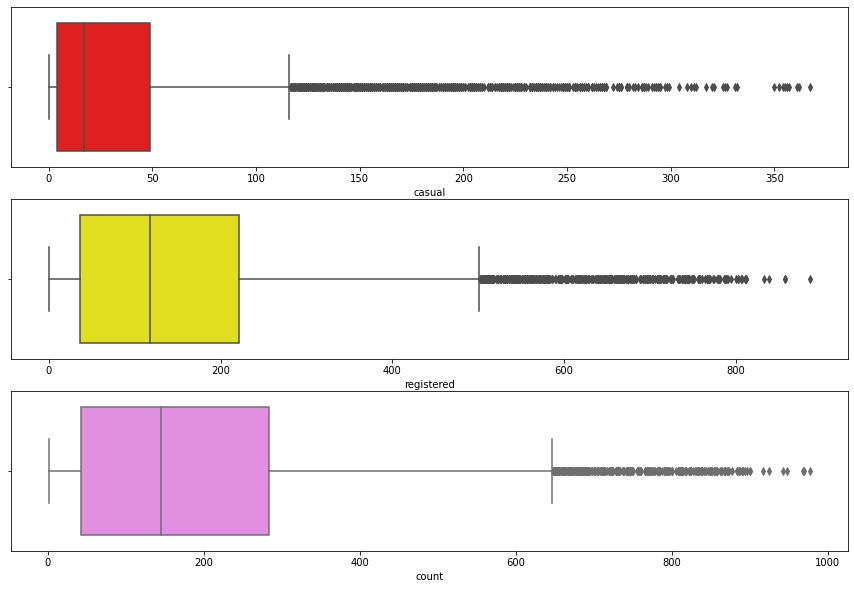

In [19]:
fig, axis = plt.subplots(nrows=3, ncols=1, figsize=(15,10))
sns.boxplot(data=df, x='casual',ax=axis[0],color = "red")
sns.boxplot(data=df, x='registered',ax=axis[1],color = "yellow")
sns.boxplot(data=df, x='count',ax=axis[2],color = "violet")
plt.show()

# Insights
1) temp , atemp and humidity have no outliers in the data.
2) Windspeed , causal, registered and count have outliers in the data.

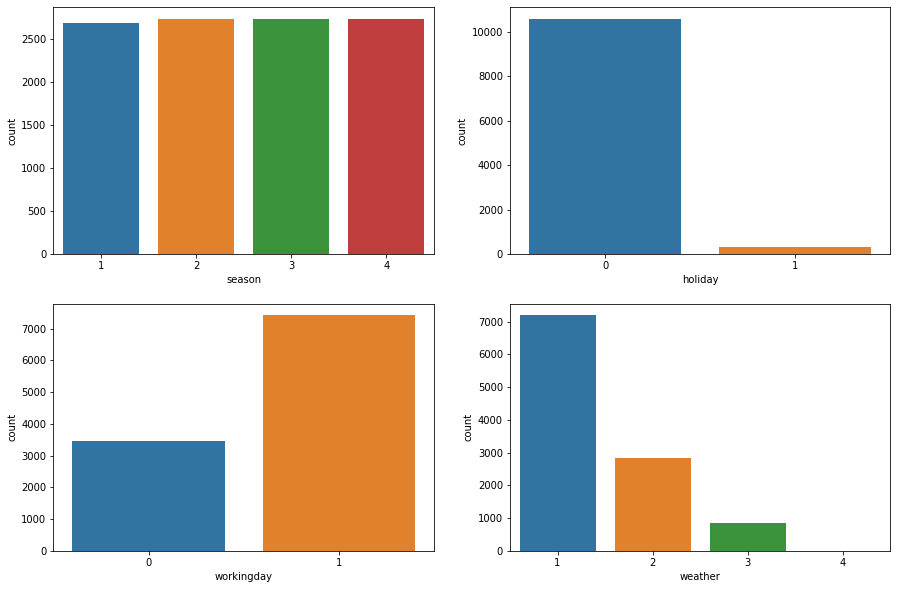

In [20]:
fig, axis = plt.subplots(nrows=2, ncols=2, figsize=(15,10))
sns.countplot(data=df, x='season', ax=axis[0,0])
sns.countplot(data=df, x='holiday', ax=axis[0,1])
sns.countplot(data=df, x='workingday', ax=axis[1,0])
sns.countplot(data=df, x='weather',ax=axis[1,1])
plt.show()

# Insights
1) All four seasons are equally distributed.
2) Non-holidays are more common than holidays.
3) Working days are more compared to non-working days.
4) The most preferred weather is 1 rather than 2 and 3.

# Bivariate Analysis:

Analyzing the variation in users with the following,

1. Season vs Count
2. Holiday vs Count
3. workingday vs Count
4. weather vs Count

note : Count contain both users data (Casual & Registered)

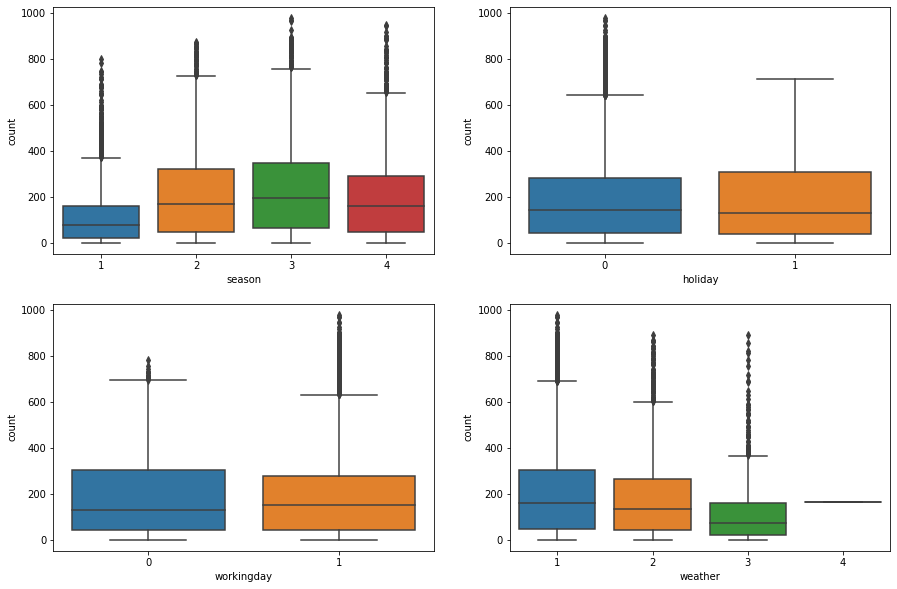

In [21]:
fig, axis = plt.subplots(nrows=2, ncols=2, figsize=(15,10))
sns.boxplot(data=df, x='season', y='count',ax=axis[0,0])
sns.boxplot(data=df, x='holiday', y='count',ax=axis[0,1])
sns.boxplot(data=df, x='workingday', y='count',ax=axis[1,0])
sns.boxplot(data=df, x='weather',y='count',ax=axis[1,1])
plt.show()

# Insights
1) In summer, fall, and winter, more bikes are rented compared to the spring season.
2) On holidays, more bikes are rented compared to non-holidays.
3) On non-working days, more bikes are rented compared to working days.
4) More bikes are rented during clear skies, which are slightly cloudy and a little snowy.
5) Very few bikes are rented during rainy

Analyzing the variation in users with the following,

1. temp vs Count
2. atemp vs Count
3. humidity vs Count
4. windspeed vs Count

note : Count contain both users data (Casual & Registered)

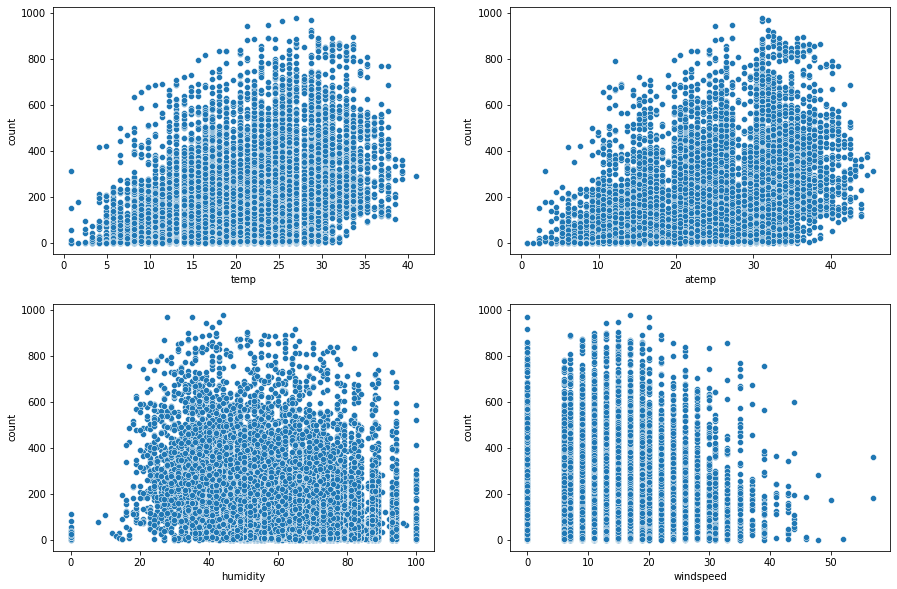

In [22]:
fig, axis = plt.subplots(nrows=2, ncols=2, figsize=(15,10))
sns.scatterplot(data=df, x='temp', y='count',ax=axis[0,0])
sns.scatterplot(data=df, x='atemp', y='count',ax=axis[0,1])
sns.scatterplot(data=df, x='humidity', y='count',ax=axis[1,0])
sns.scatterplot(data=df, x='windspeed',y='count',ax=axis[1,1])
plt.show()

# Insight
1) When the temperature is less than 10, the number of bikes rented is less.
2) When the users riding temperature is less than 10, the number of bikes rented is low.
3) When humidity is less than 20, the number of bikes rented is very low.
4) When windspeed is greater than 35, the number of bikes rented is less.

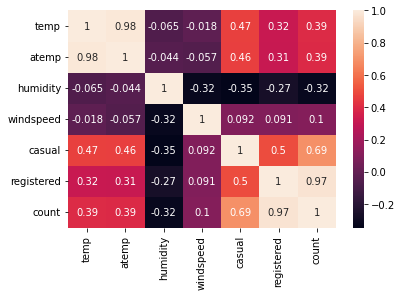

In [23]:
df.corr()['count']
sns.heatmap(df.corr(),annot=True)
plt.show()

# Hypothesis Testing ( 2-Sample T-Test ) :

# Check if Working Day has an effect on the number of electric cycles rented : 

# Null Hypothesis: Working day has no effect on the number of cycles being rented. 

# Alternate Hypothesis: Working day has effect on the number of cycles being rented. 

# Significance level (alpha): 0.05

# We will use the 2-Sample T-Test to test the Hypothesis defined above

In [24]:
# Separating the data into two groups:
# Non_working_day_data contains the 'count' values for non-working days (workingday == 0).
Non_working_day_data = df[df['workingday'] == 0]['count'].values 

# Working_day_data contains the 'count' values for working days (workingday == 1).
Working_day_data = df[df['workingday'] == 1]['count'].values 

# Set the significance level (alpha) to 0.05.
alpha = 0.05

# Perform a two-sample t-test to compare the means of the two groups.
t_stat, p_value = ttest_ind(Non_working_day_data, Working_day_data)

# Check if the p-value is less than alpha to make a decision.
if p_value < alpha:
    # If p-value is less than alpha, reject the null hypothesis.
    print('Reject Ho: Working day has an effect on the number of cycles being rented.')
else:
    # If p-value is greater than or equal to alpha, fail to reject the null hypothesis.
    print('Fail to reject Ho: Working day has no effect on the number of cycles being rented.')

Fail to reject Ho: Working day has no effect on the number of cycles being rented.


# Insights:
1) Since the p-value is greater than 0.05, we cannot reject the null hypothesis.
2) We don't have sufficient evidence to say that working days have an effect on the number of cycles being rented.

# Hypothesis Testing ( Chi-square test ) :

# check if Weather is dependent on the season

# Null Hypothesis : Weather is not dependent of the season 
# Alternate Hypothesis : Weather is dependent of the season 
# Significance level (alpha): 0.05

# We will use the Chi-square test  to test the Hypothesis defined above

In [25]:
weather_vs_season_table = pd.crosstab(df['season'], df['weather'])
print("weather vs season table observed values:")
weather_vs_season_table

weather vs season table observed values:


weather,1,2,3,4
season,,,,
1,1759,715,211,1
2,1801,708,224,0
3,1930,604,199,0
4,1702,807,225,0


In [26]:
# Perform a chi-squared test of independence on a contingency table
chi_stat, p_value, df, expected_freq = chi2_contingency(weather_vs_season_table)

# Print the calculated chi-squared statistic
print('chi_stat:', chi_stat)

# Print the p-value associated with the test
print('p_value:', p_value)

# Print the degrees of freedom for the test
print('degree of freedom:', df)

# Print the expected frequencies for each cell in the contingency table
print('expected_freq:', expected_freq)

# Check if the p-value is less than 0.05 (common significance level)
if p_value < 0.05:
    # If p-value is less than 0.05, reject the null hypothesis (Ho)
    print('reject Ho: Weather is dependent on the season.')
else:
    # If p-value is greater than or equal to 0.05, fail to reject the null hypothesis (Ho)
    print('Fail to reject Ho: Weather is not dependent on the season.')

chi_stat: 49.158655596893624
p_value: 1.549925073686492e-07
degree of freedom: 9
expected_freq: [[1.77454639e+03 6.99258130e+02 2.11948742e+02 2.46738931e-01]
 [1.80559765e+03 7.11493845e+02 2.15657450e+02 2.51056403e-01]
 [1.80559765e+03 7.11493845e+02 2.15657450e+02 2.51056403e-01]
 [1.80625831e+03 7.11754180e+02 2.15736359e+02 2.51148264e-01]]
reject Ho: Weather is dependent on the season.


# Insights:
1) Since the p-value is less than 0.05, we reject the null hypothesis.
2) Weather is dependent on the season.

# Hypothesis Testing ( ANNOVA ) :

# to check if No. of cycles rented is similar or different in different 1. weather 2. season

# Null Hypothesis: Number of cycles rented is similar in different weather and season. 
# Alternate Hypothesis: Number of cycles rented is not similar in different weather and season. 
# Significance level (alpha): 0.05 

******************************************************************************************************************************

# Before running the annova test, we are going to check these 3 parameters:

# 1) Check that the graph is gaussian both visually and using a QQ plot.

# 2) Data should be independent.

# 3) Check the equal variance using Levene's test.

-----------------------------------------------------------------------------------------------------------------------------

In [27]:
# Define data groups based on weather conditions
clear_sky = df_1[df_1['weather'] == 1]['count'].values
mist = df_1[df_1['weather'] == 2]['count'].values
little_snow = df_1[df_1['weather'] == 3]['count'].values
heavy_rain = df_1[df_1['weather'] == 4]['count'].values

# Define data groups based on seasons
spring = df_1[df_1['season'] == 1]['count'].values
summer = df_1[df_1['season'] == 2]['count'].values
fall = df_1[df_1['season'] == 3]['count'].values
winter = df_1[df_1['season'] == 4]['count'].values

# Group all the data arrays into a list for ANOVA
season_weather = [clear_sky, mist, little_snow, heavy_rain, spring, summer, fall, winter]

# Visually checking the graph

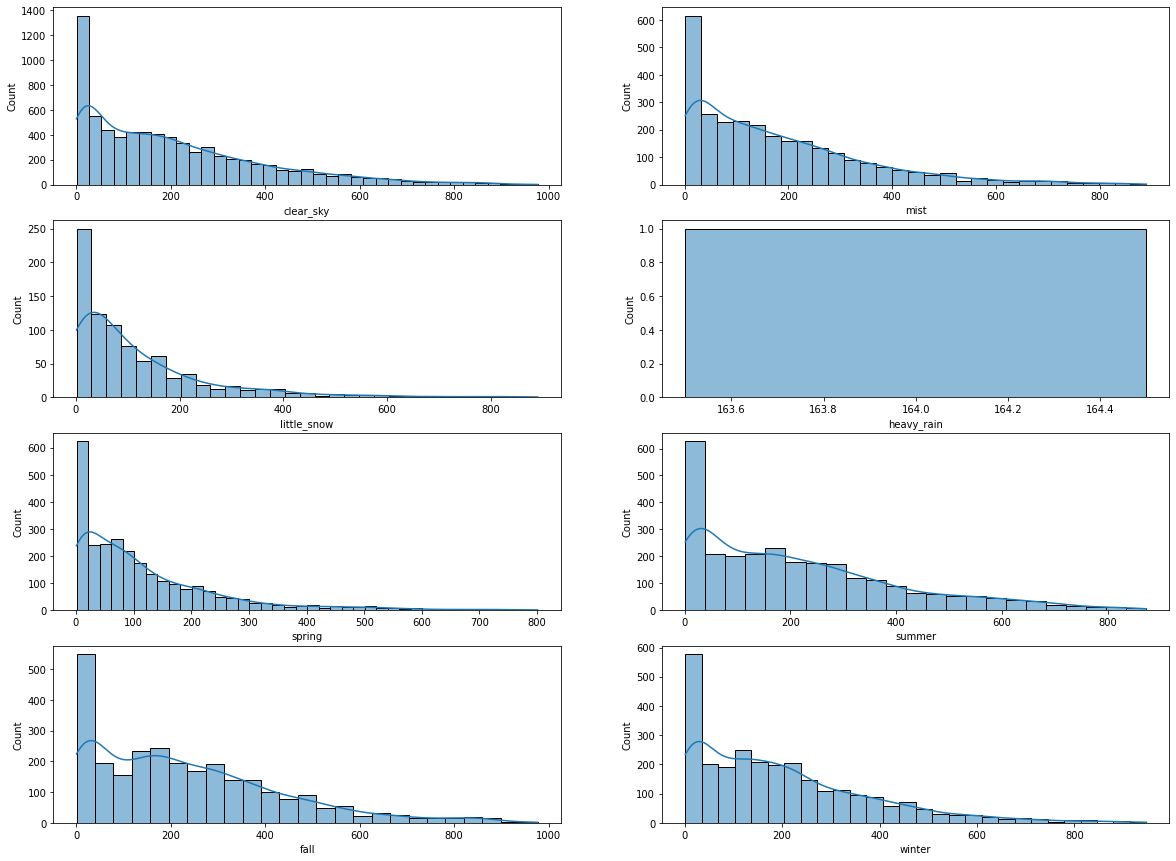

In [28]:
fig, axis = plt.subplots(nrows=4, ncols=2, figsize=(20, 15))
x_labels = ["clear_sky", "mist", "little_snow", "heavy_rain", "spring", "summer", "fall", "winter"]

for i in range(8):
    sns.histplot(season_weather[i], ax=axis[i // 2, i % 2], kde=True)
    axis[i // 2, i % 2].set_xlabel(x_labels[i])

plt.show()

# Using QQ plot

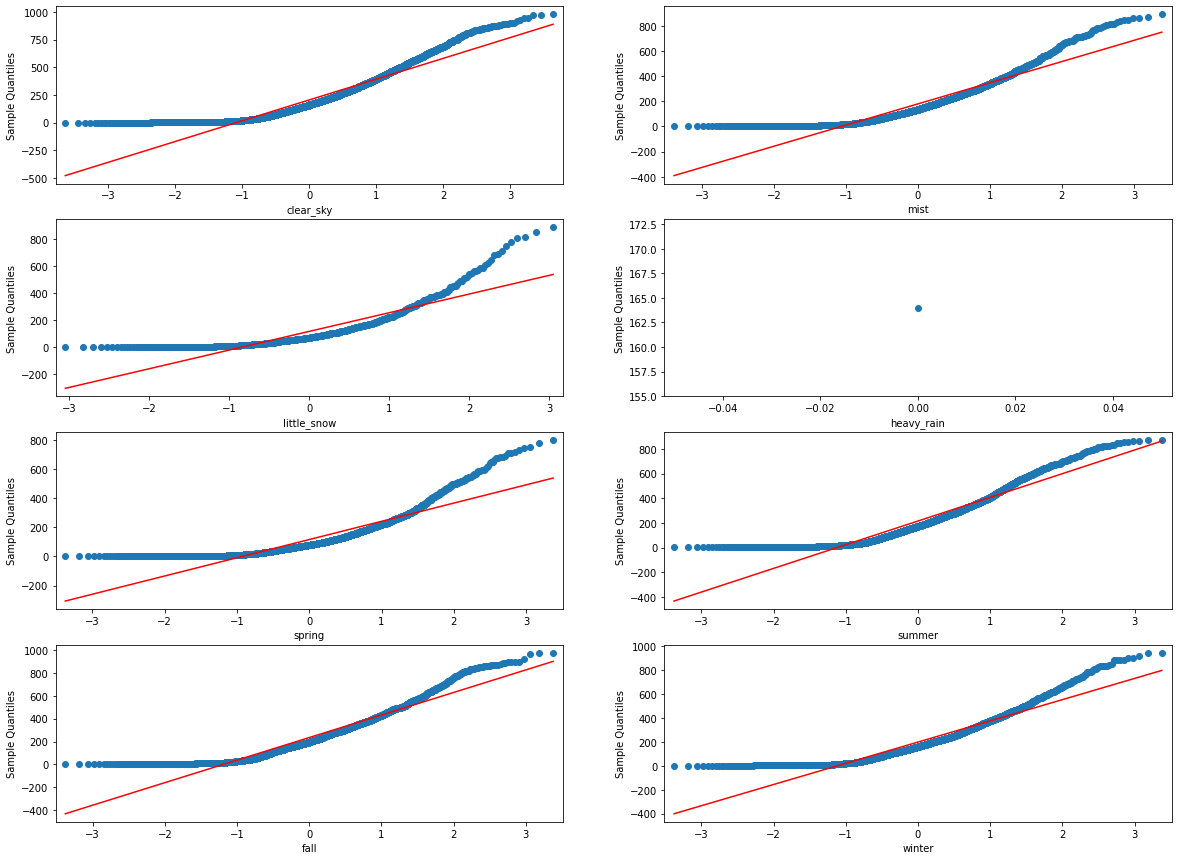

In [29]:
fig, axis = plt.subplots(nrows=4, ncols=2, figsize=(20, 15))
x_labels = ["clear_sky", "mist", "little_snow", "heavy_rain", "spring", "summer", "fall", "winter"]

for i in range(8):
    qqplot(season_weather[i],ax=axis[i // 2, i % 2], line="s")
    axis[i // 2, i % 2].set_xlabel(x_labels[i])

plt.show()

# Insight:
1) With reference to the above data, the given graph is not gaussian.

# Data is independent

# Levene Test

In [30]:
# Perform Levene's test
levene_stat, p_value = levene(clear_sky, mist, little_snow, heavy_rain, spring, summer, fall, winter)

# Define your significance level (alpha)
alpha = 0.05

if p_value < alpha:
    print("Reject the Null hypothesis. Variances are not equal.")
else:
    print("Fail to Reject the Null hypothesis. Variances are equal.")

Reject the Null hypothesis. Variances are not equal.


# Insight :
With reference to the above data, we cannot perform an ANOVA test for the above dataset.

# Since the assumption of Anova has failed, use the Krusal-Wallis test

In [31]:
# Perform the Kruskal-Wallis test to compare the groups
kruskal_stat, p_value = kruskal(clear_sky,mist,little_snow,heavy_rain,spring,summer,fall,winter)

# Print the calculated p-value to the console
print("p_value =", p_value)

# Check if the p-value is less than 0.05 (chosen significance level)
if p_value < 0.05:
    print("Since p-value is less than 0.05, we reject the null hypothesis")
else:
    print("Since p-value is greater than 0.05, we fail to reject the null hypothesis")

p_value = 4.6144409339002975e-191
Since p-value is less than 0.05, we reject the null hypothesis


# Insight:
This implies that the number of cycles rented is different in different weather and season conditions.

# Final Insights :
1) In summer, fall, and winter, more bikes are rented compared to the spring season.

2) On holidays, more bikes are rented compared to non-holidays.

3) On non-working days, more bikes are rented compared to working days.

4) More bikes are rented during clear skies, which are slightly cloudy and a little snowy.

5) Very few bikes are rented during rainy.

6) When the temperature is less than 10, the number of bikes rented is less.

7) When the users riding temperature is less than 10, the number of bikes rented is low.

8) When humidity is less than 20, the number of bikes rented is very low.

9) When windspeed is greater than 35, the number of bikes rented is less.

# Recommendations : 
1) In the summer and fall seasons, the company should have more bikes in stock to berented. Because the demand in these seasons is higher as compared to other seasons.

2) With a significance level of 0.05, working days have no effect on the number of bikes being rented.

3) On very humid days, the company should have fewer bikes in stock to rent.

4) If the temperature is less than 10 or on very cold days, the company should have fewer bikes.

5) If the windspeed is greater than 35 or in thunderstorms, the company should have fewer bikes in stock to rent.

6) With a significance level of 0.05, the number of cycles rented is different in different weather and season conditions.

7) With a significance level of 0.05, weather is dependent on the season.